In [1]:
from cortexlib.utils import file as futils
from cortexlib.utils.logging import Logger
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

logger = Logger()

image_representation_reduced_to_n_pcs = 50

In [2]:
MOUSE_ID = futils.get_mouse_id()
logger.info(f"This notebook is running for mouse {MOUSE_ID}")

16:58:21 | INFO     | ℹ️ This notebook is running for mouse m02_d3


In [3]:
simclr_fev_results = futils.read_json_file_as_dataframe('./prediction.json')
simclr_fev_pcs = simclr_fev_results[simclr_fev_results['n_pcs'] == image_representation_reduced_to_n_pcs].reset_index(drop=True)
simclr_fev_pcs

,layer,n_pcs,test_r2,mean_fev
0,layer1,50.0,0.436336,0.475827
1,layer2,50.0,0.475359,0.518075
2,layer3,50.0,0.526339,0.573269
3,layer4,50.0,0.547740,0.596439
4,fc,50.0,0.494324,0.538608


In [4]:
simclr_dim_results = futils.read_json_file_as_dataframe('./dimensionality.json')
simclr_dim_results

,layer,alpha,alpha_no_pc1
0,layer1,3.812032,4.126887
1,layer2,3.438075,3.883147
2,layer3,1.873687,1.878050
3,layer4,1.880854,1.888238
4,fc,1.703780,1.712227


In [5]:
simclr_rsa_results = futils.read_json_file_as_dataframe('./representational_similarity.json')
simclr_rsa_pcs = simclr_rsa_results[simclr_rsa_results['n_pcs'] == image_representation_reduced_to_n_pcs].reset_index(drop=True)
simclr_rsa_pcs

,layer,n_pcs,spearman_correlation
0,layer1,50.0,0.125409
1,layer2,50.0,0.098143
2,layer3,50.0,0.120918
3,layer4,50.0,0.094914
4,fc,50.0,0.123880


In [ ]:
simclr_sem_results = futils.read_json_file_as_dataframe('./semanticity.json')
simclr_sem_pcs = simclr_sem_results[simclr_sem_results['n_pcs'] == image_representation_reduced_to_n_pcs].reset_index(drop=True)
simclr_sem_pcs

,layer,silhouette_score
0,layer1,-0.089259
1,layer2,-0.090697
2,layer3,-0.019507
3,layer4,0.085776
4,fc,0.101782


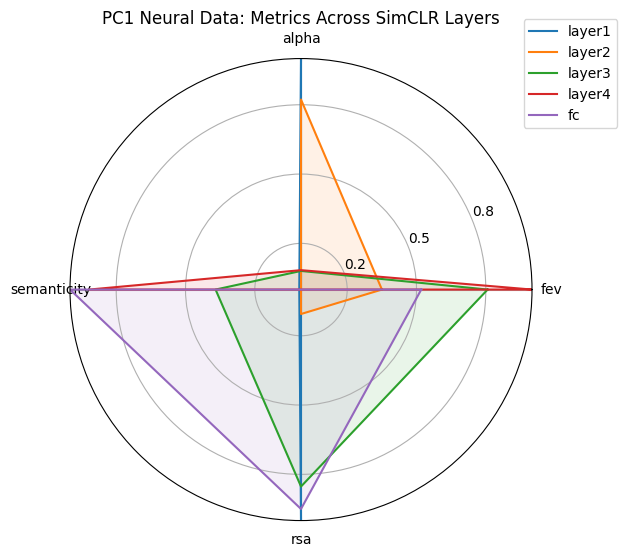

In [ ]:
data = {
    'layer': simclr_fev_pcs['layer'].values,
    'fev': simclr_fev_pcs['mean_fev'].values,
    'alpha': simclr_dim_results['alpha'].values,
    'semanticity': simclr_sem_pcs['silhouette_score'].values,
    'rsa': simclr_rsa_pcs['spearman_correlation'].values
}
df = pd.DataFrame(data)

# Normalise each metric to [0, 1]
metrics = ['fev', 'alpha', 'semanticity', 'rsa']
scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[metrics] = scaler.fit_transform(df[metrics])

labels = metrics
num_vars = len(labels)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # close the loop

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

for i, row in df_scaled.iterrows():
    values = row[metrics].tolist()
    values += values[:1]  # close the loop
    ax.plot(angles, values, label=row['layer'])
    ax.fill(angles, values, alpha=0.1)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
ax.set_yticks([0.2, 0.5, 0.8])
ax.set_yticklabels(['0.2', '0.5', '0.8'])
ax.set_ylim(0, 1)
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.title("PC1 Neural Data: Metrics Across SimCLR Layers")
plt.show()